<a href="https://colab.research.google.com/github/brinda142/CODSOFT/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

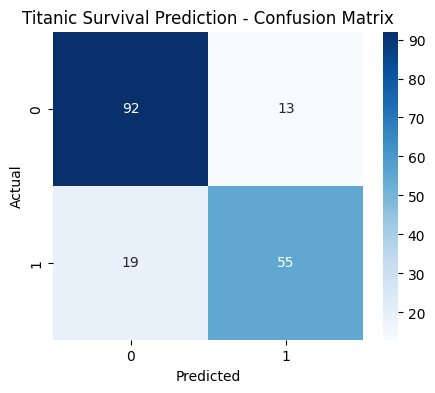

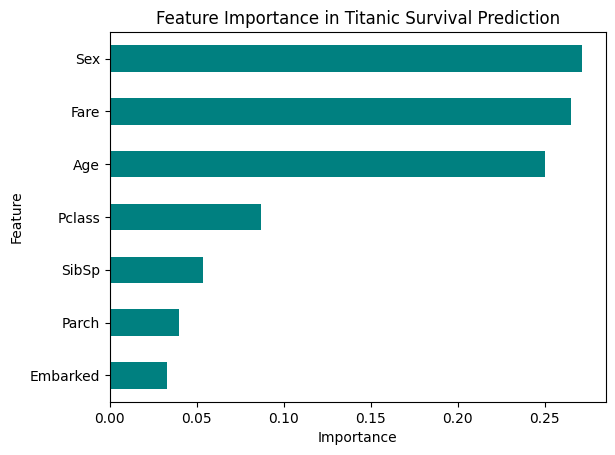


🧭 Prediction for sample passenger: Did not survive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("/content/Titanic-Dataset.csv")


print("✅ Dataset loaded successfully!")
print(df.head())
print("\nDataset info:")
print(df.info())

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])


X = df.drop('Survived', axis=1)
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Titanic Survival Prediction - Confusion Matrix')
plt.show()

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance in Titanic Survival Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


sample = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1],
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [0]
})
sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)[0]
print("\n🧭 Prediction for sample passenger:", "Survived" if pred == 1 else "Did not survive")
